In [2]:
pip install pandas matplotlib statsmodels seasonal

Note: you may need to restart the kernel to use updated packages.


In [14]:
#q1-1

import pandas as pd

file_path = "../data/practice4-1/AirPassengers24.csv"
data = pd.read_csv(file_path)

# データの中身を確認
print(data.head(13))

         Month  Passengers
0   1949-01-01         112
1   1949-02-01         118
2   1949-03-01         132
3   1949-04-01         129
4   1949-05-01         121
5   1949-06-01         135
6   1949-07-01         148
7   1949-08-01         148
8   1949-09-01         136
9   1949-10-01         119
10  1949-11-01         104
11  1949-12-01         118
12  1950-01-01         115


In [16]:
print(data.tail(5))

          Month  Passengers
139  1960-08-01         606
140  1960-09-01         508
141  1960-10-01         461
142  1960-11-01         390
143  1960-12-01         432


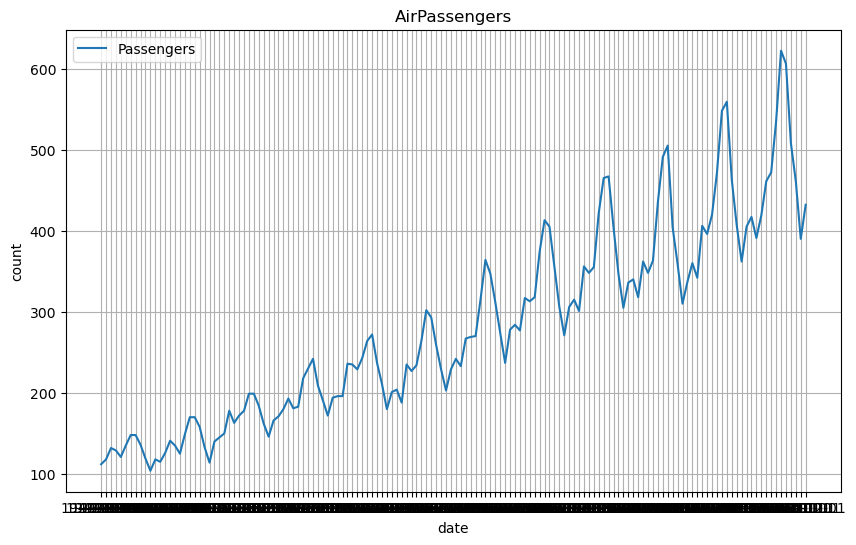

In [7]:
import matplotlib.pyplot as plt

# 折れ線グラフを描画
plt.figure(figsize=(10, 6))
for column in data.columns[1:]:  # 1列目以降のデータをプロット
    plt.plot(data[data.columns[0]], data[column], label=column)

# グラフの設定
plt.title("AirPassengers")
plt.xlabel("date")  # X軸ラベル
plt.ylabel("count")  # Y軸ラベル
plt.legend()  # 凡例
plt.grid(True)  # グリッド

# 5. グラフを表示
plt.show()

In [8]:
#グラフデータの準備

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

file_path = "../data/practice4-1/AirPassengers24.csv"
data = pd.read_csv(file_path)

# 加法モデルの分解
additive_result = seasonal_decompose(data['Passengers'], model='additive', period=12)

# 乗法モデルの分解
multiplicative_result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# STL分解
stl = STL(data['Passengers'], period=12, robust=True)
stl_result = stl.fit()

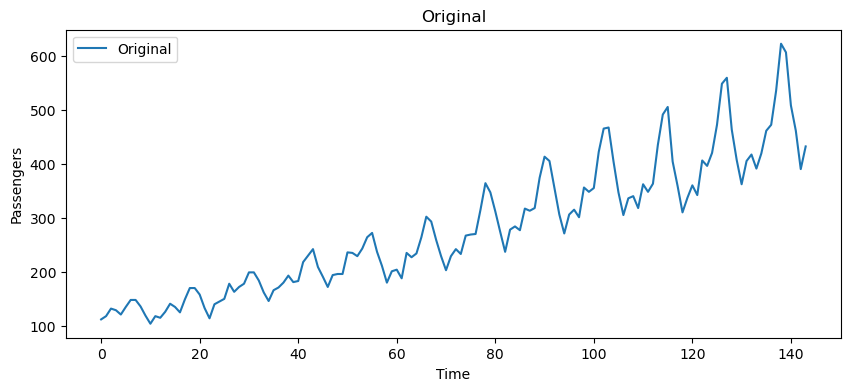

In [38]:
# 元データのプロット
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Passengers'], label='Original')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Original')
plt.legend()

plt.show()

In [ ]:
#加法モデル

plt.figure(figsize=(16, 12))

# 各コンポーネントを個別にプロット
plt.subplot(2, 2, 1)
plt.plot(additive_result.observed, label='Passengers')
plt.title('Observed')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(additive_result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(additive_result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(additive_result.resid, label='Residual', color='red')
plt.title('Residual')

plt.suptitle('Additive Model - Decomposition', fontsize=14)

plt.show()

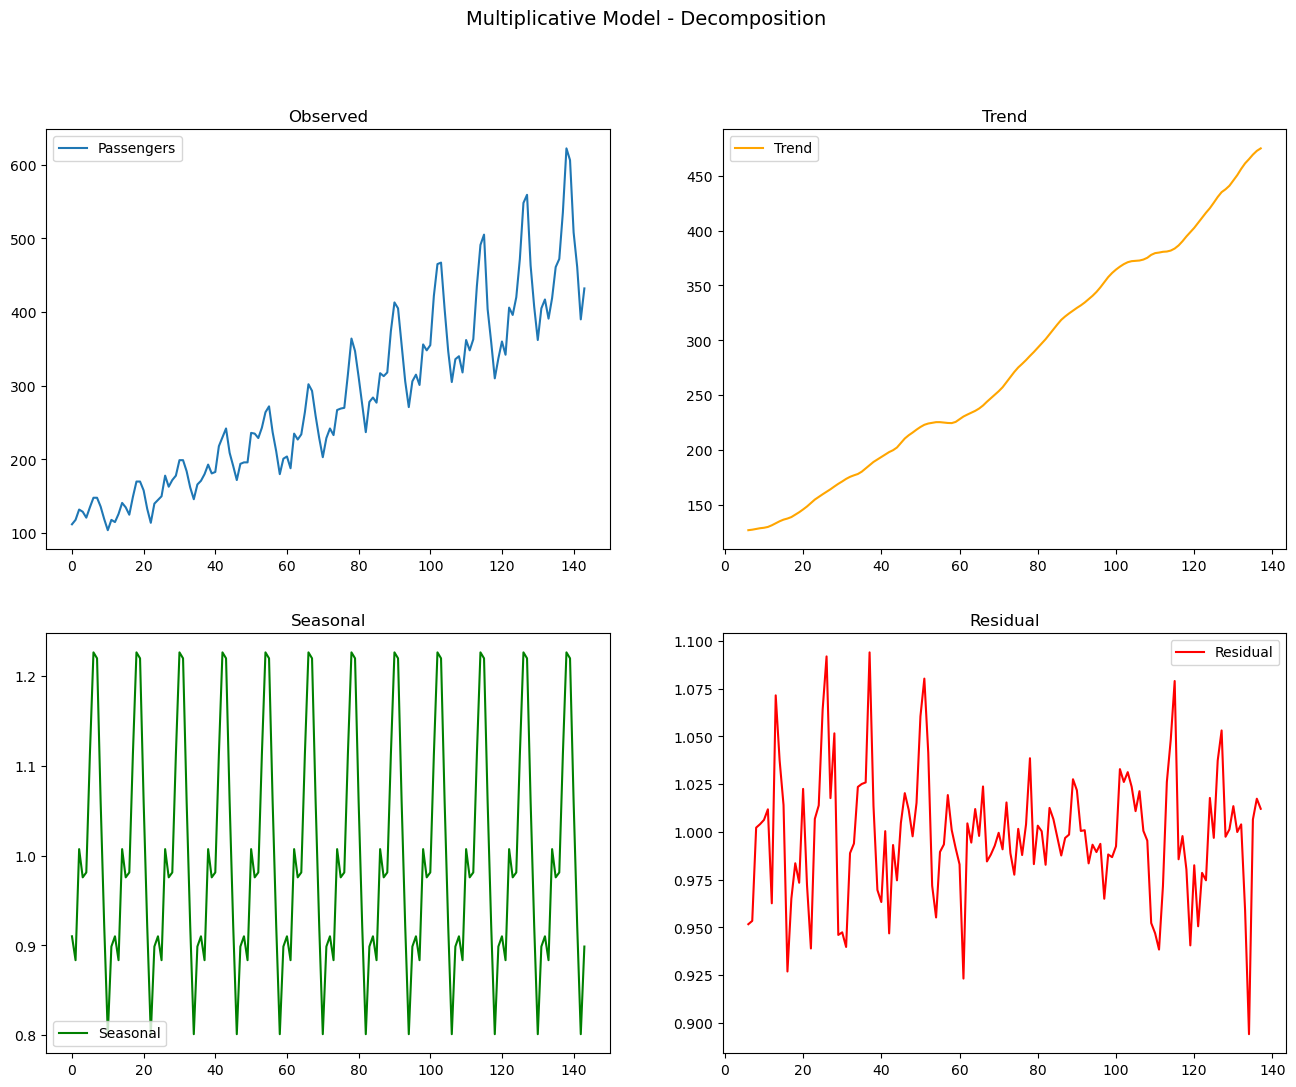

In [39]:
# 乗法モデル

plt.figure(figsize=(16, 12))

# 各コンポーネントを個別にプロット
plt.subplot(2, 2, 1)
plt.plot(multiplicative_result.observed, label='Passengers')
plt.title('Observed')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(multiplicative_result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(multiplicative_result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(multiplicative_result.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend()

plt.suptitle('Multiplicative Model - Decomposition', fontsize=14)

plt.show()

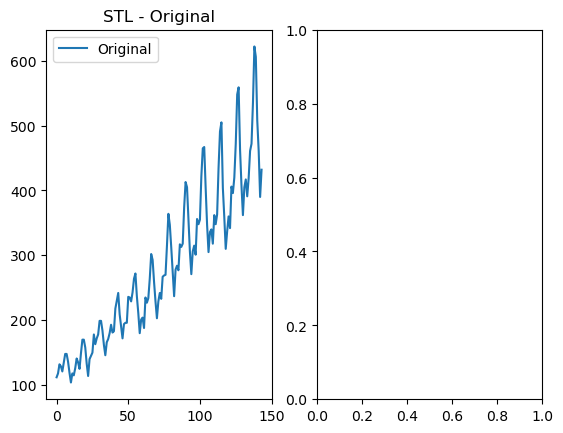

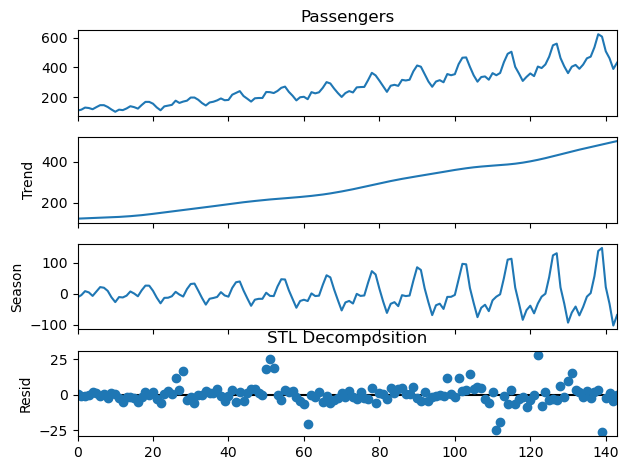

In [13]:
# STL分解
plt.subplot(1, 2, 1)
plt.plot(data.index, data['Passengers'], label='Original')
plt.title('STL - Original')
plt.legend()

plt.subplot(1, 2, 2)
stl_result.plot()
plt.title('STL Decomposition')

plt.show()